<a href="https://colab.research.google.com/github/zhangfuyao/Google-colab/blob/test/GBRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold #k折交叉验证
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.metrics import make_scorer
import os

In [3]:
boston=load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
x=boston.data
y=boston.target
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.15,random_state=0)

In [6]:
def performance_metric(y_true, y_predict):
    from sklearn.metrics import r2_score
    score = r2_score(y_true,y_predict)
    return score

In [9]:
def fit_model(x, y):
    cross_validator = KFold(n_splits=3,shuffle=True, random_state=500) #交叉验证
    from sklearn.ensemble import GradientBoostingRegressor
    regressor = GradientBoostingRegressor(loss='ls',random_state=500,max_features=None,min_samples_leaf=10,learning_rate=0.2)
    params = {'max_depth':range(1,30)}  #决策树最大深度
    scoring_fnc = make_scorer(performance_metric)   # 评分函数
    grid = GridSearchCV(regressor,params,cv=cross_validator,scoring=scoring_fnc)
    # 基于输入数据 [x,y]，进行网格搜索
    grid = grid.fit(x, y)
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

0.6977515956259663


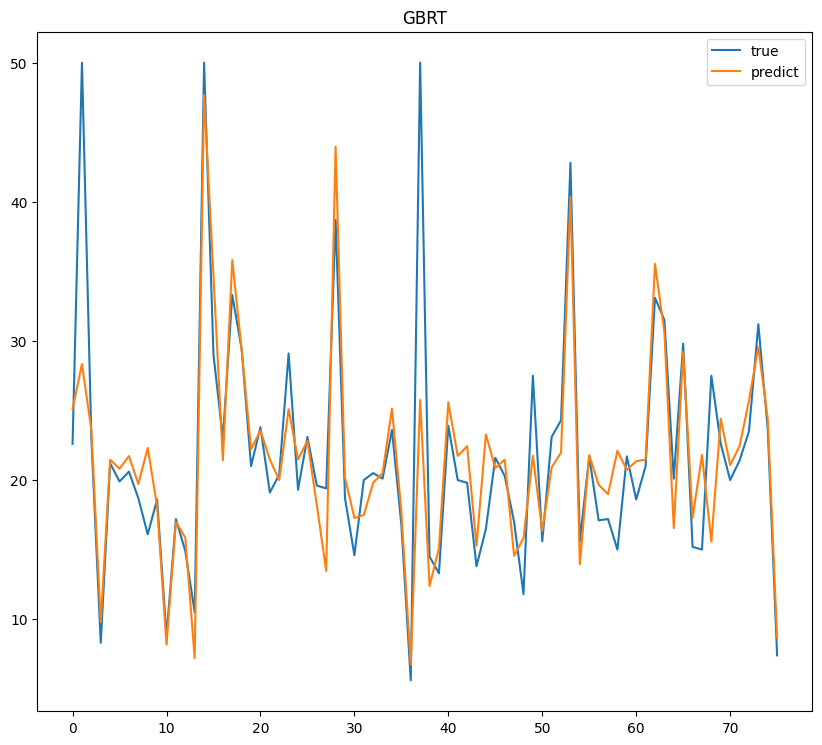

In [11]:
model = fit_model(train_x,train_y)
def model_imge(model):
    #joblib.dump(model,'./keep_model/model.pkl')
    pre_y = model.predict(test_x)
    #计算决策系数r方
    r2 = performance_metric(test_y,pre_y)  
    print(r2)
    plt.figure(figsize=(10,9),dpi=100)
    plt.plot(test_y,label='true')
    plt.plot(pre_y,label='predict')
    plt.legend()
    plt.title('GBRT')
    plt.show()
model_imge(model)